In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import astropy.units as u
import astropy.constants as c
import itertools
%matplotlib inline

dturb = '/Users/roxanachira/Dropbox/chira2018/pics/data/'

In [2]:
def zboldyrev(p):
    return (p/9.+1.-(1./3.)**(p/3.))

def zshe(p):
    return (p/9.+2.-2.*(2./3.)**(p/3.))

In [3]:
fcloud = ['M3','M4','M8']
fjeans = ['04','08','32']
fdir   = ['x','y','z']

ms = 10
lw = 7

xlim     = [ 0.0,6.2]
ylimzeta = [-0.5,1.8]

color = ['red','green','blue']

snM3 = np.array([ 0.7,1.2,1.8,2.6,3.8,4.3 ])
snM4 = np.array([ 0.4,2.1,3.8,5.3 ])
snM8 = np.array([ 0.6 ])

dsnM3 = np.array([ 100.,100.,79.85,56.73,100.,100. ]) * c.pc.to('km').value
dsnM4 = np.array([ 79.65,59.43,53.44,67.62 ]) * c.pc.to('km').value
dsnM8 = np.array([ 44.47 ]) * c.pc.to('km').value

snspeed = 100. / u.second.to('a')

snaM3 = snM3 + 1e-6 * dsnM3 / snspeed
snaM4 = snM4 + 1e-6 * dsnM4 / snspeed
snaM8 = snM8 + 1e-6 * dsnM8 / snspeed

mabM3 = np.array([ 1.2,2.8 ])
maeM3 = np.array([ 2.4,3.9 ])
mabM4 = np.array([ 1.5 ])
maeM4 = np.array([ 2.8 ])
mabM8 = np.array([ 1.0,2.5 ])
maeM8 = np.array([ 2.0,3.2 ])

In [6]:
# data from Padoan et al. (2003)
taurus_zeta = np.array([0.77,1.10]) # Taurus, only zeta(2) & zeta(3)
perseus_zeta = np.array([0.83,1.18]) # Perseus, only zeta(2) & zeta(3)

padoan_z = np.array([0.421,0.719,1.004]) # Taurus & Perseus

In [12]:
taurus_zeta/taurus_zeta[1], perseus_zeta/perseus_zeta[1]

(array([ 0.7,  1. ]), array([ 0.70338983,  1.        ]))

In [13]:
# data from A. Zernickel, HII region NGC 6334
ngc6334_zeta = np.array([0.38,0.76])
ngc6334_zeta_04pc = np.array([0.483,0.79])

In [17]:
cloud = fcloud[0]
jeans = fjeans[0]
ifile = glob(('%svsfhr%s/zeta*%s*out' % (dturb,jeans,cloud)))[0]
zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(1,2,3),unpack=True)
z1,z2,z3 = zeta1/zeta3,zeta2/zeta3,zeta3/zeta3

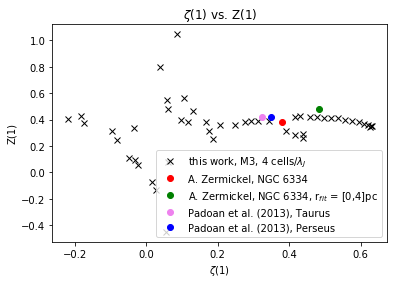

In [28]:
plt.plot(zeta1,z1,marker='x',ls='',color='black',label=('this work, %s, %i cells/$\lambda_J$' % (cloud,int(jeans))))
plt.plot(ngc6334_zeta[0],ngc6334_zeta[0],ls='',marker='o',color='red', label='A. Zermickel, NGC 6334')
plt.plot(ngc6334_zeta_04pc[0],ngc6334_zeta_04pc[0],ls='',marker='o',color='green', label='A. Zermickel, NGC 6334, r$_{fit}$ = [0,4]pc')
plt.plot(padoan_z[0]*taurus_zeta[0],padoan_z[0],ls='',marker='o',color='violet', label='Padoan et al. (2013), Taurus')
plt.plot(padoan_z[0]*perseus_zeta[0],padoan_z[0],ls='',marker='o',color='blue', label='Padoan et al. (2013), Perseus')
plt.title('$\zeta$(1) vs. Z(1)')
plt.xlabel('$\zeta$(1)')
plt.ylabel('Z(1)')
plt.legend(loc=0)

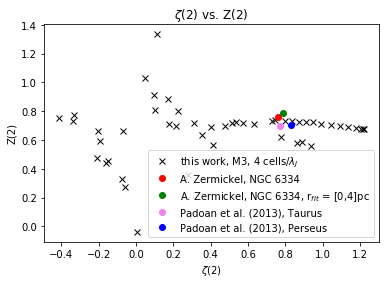

In [32]:
plt.plot(zeta2,z2,marker='x',ls='',color='black',label=('this work, %s, %i cells/$\lambda_J$' % (cloud,int(jeans))))
plt.plot(ngc6334_zeta[1],ngc6334_zeta[1],ls='',marker='o',color='red', label='A. Zermickel, NGC 6334')
plt.plot(ngc6334_zeta_04pc[1],ngc6334_zeta_04pc[1],ls='',marker='o',color='green', label='A. Zermickel, NGC 6334, r$_{fit}$ = [0,4]pc')
plt.plot(taurus_zeta[0],taurus_zeta[0]/taurus_zeta[1],ls='',marker='o',color='violet', label='Padoan et al. (2013), Taurus')
plt.plot(perseus_zeta[0],perseus_zeta[0]/perseus_zeta[1],ls='',marker='o',color='blue', label='Padoan et al. (2013), Perseus')
plt.title('$\zeta$(2) vs. Z(2)')
plt.xlabel('$\zeta$(2)')
plt.ylabel('Z(2)')
plt.legend(loc=0)

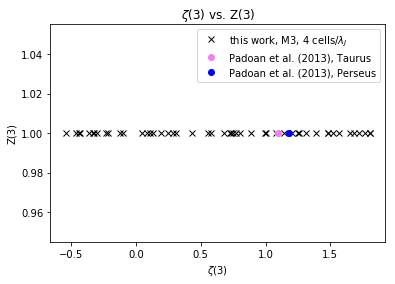

In [31]:
plt.plot(zeta3,z3,marker='x',ls='',color='black',label=('this work, %s, %i cells/$\lambda_J$' % (cloud,int(jeans))))
plt.plot(taurus_zeta[1],taurus_zeta[1]/taurus_zeta[1],ls='',marker='o',color='violet', label='Padoan et al. (2013), Taurus')
plt.plot(perseus_zeta[1],perseus_zeta[1]/perseus_zeta[1],ls='',marker='o',color='blue', label='Padoan et al. (2013), Perseus')
plt.title('$\zeta$(3) vs. Z(3)')
plt.xlabel('$\zeta$(3)')
plt.ylabel('Z(3)')
plt.legend(loc=0)